<font color='red'>**Report Submission Information (must be completed before submitting report!)**</font>
* Student 1 Full Name and Number : Kegong Zhong 750425
* Student 2 Full Name and Number : 
* Workshop day : Wednesday
* Workshop time : 6:15pm

# <font color='blue'> Workshop 2 – Machine Learning (ML) [2 weeks] </font>

## Objectives:

* Gain hands-on experience with basic machine learning paradigms.
* Familiarise yourself with some of the practical software tools used for machine learning.
* Solve basic machine learning problems using Python Scipy and Scikit-learn.
* Connect theoretical knowledge and practical usage by doing it yourself.

> __Common objectives of all workshops:__
> Gain hands-on experience and learn by doing! Understand how theoretical knowledge discussed in lectures relates to practice. Develop motivation for gaining further theoretical and practical knowledge beyond the subject material.

## Overview:
Optimisation is widely used in engineering (practice and research) today. That was not always so (see e.g. Boyd's book's preface). I expect that in the future machine learning will be as prevalently used in engineering as optimisation is used today. The arguments in favour of it are (a) increasingly more powerful computing (b) lots of data (c) decreasing storage and computing costs. At the end of the day, "machine learning" benefits substantially from these trends. However, it is still early days and we will hopefully see together how engineering world will evolve in this century.

In this workshop, you will learn how to solve machine learning problems in practice and apply common algorithms to various data sets. Doing this yourself will give you a chance to connect theoretical knowledge and practical usage. We will start with simple, easy-to-visualise (2D) data sets so that concepts become clear. More interesting problems and data will be posed as open-ended (and optional) problems.

You will also familiarise yourself with machine learning libraries of Python, which is the de-facto language for ML these days. Still, the tools and data are chosen completely for educational reasons (simplicity, accessibility, cost). There are and will be better ML frameworks and more complex data sets but it is not realistic to cover all in two weeks. Due to time limitations, we unfortunately do not focus on a big topic in this workshop and subject: [data science](https://study.unimelb.edu.au/find/courses/graduate/master-of-data-science/what-will-i-study/). You should not get the wrong impression from the nice, cleaned-up data sets you are given in this workshop. In real life, data is messy (as everything else!) and more than half of data science is about preparing data itself. 

> In the future, you should consider learning additional ML software packages and libraries. Finding the right tool for the right job is an important skill obtained through knowledge and experience. I would also recommend learning more about data preparation and analysis. The popular [Pandas](https://pandas.pydata.org/) library, which we briefly use, makes a good starting point.

## Workshop Preparation: [before you arrive to the lab]

You can come to the workshops as you are or you can prepare beforehand to learn much more! 
We will give you a lot of time to finish the tasks but those are the bare minimums. Just like in the lectures, the topics we cover in the workshops are quite deep and we can only do so much in two hours. There is much more to learn and coming prepared to the workshop is one of the best ways to gain more knowledge! For example, there are a few questions in each workshop which you can answer beforehand.

> __Self-learning__ is one of the most important skills that you should acquire as a student. Today, self-learning is much easier than it used to be thanks to a plethora of online resources.
For this workshop, start by exploring the resource mentioned in the preparation steps below.

### Workshop Preparation Steps:

1. Common step for all workshops: read the Workshop Manual (Jupyter Notebook) beforehand!
2. Review relevant lecture slides on machine learning.
3. Read/check relevant reading material and links from LMS/Resources-Reading
4. Check the embedded links below hints and background.
5. _\[optional\]_ _You can start with workshop tasks and questions_

### Additional packages to install

In this workshop, we will use the [_Regressors_](https://regressors.readthedocs.io/en/latest/) package for convenience for couple of minor things. You can [install the package](https://regressors.readthedocs.io/en/latest/installation.html) simply by using

```pip install regressors``` 

from within the Anaconda environment. Ask for help from your demonstrator in case you need it.



## Tasks and Questions:

Follow the procedures described below, perform the given tasks and answer the workshop questions __on the Python notebook itself!__ The marks associated with each question are clearly stated. Keep your answers to the point and complete to get full marks! Ensure that your code is clean and appropriately commented. 

__The resulting notebook will be your Workshop Report!__

> __The goal is to learn__, NOT blindly follow the procedures in the fastest possible way! __Do not simply copy-paste answers (from Internet, friends, etc.). You can and should use all available resources but only to develop your own understanding. If you copy-paste, you will pay the price in the final exam!__

# Section 1: Linear Regression, Overfitting, and Regularisation

## 1.1 _Example_. Using curve fitting to model Diode characteristics.

![Diode characteristic](img/diode.png)

The diagram above shows the I-V curve of a [diode](https://en.wikipedia.org/wiki/Diode) widely used in electronic circuits, see [1N4001-D spec sheet (right click to download)](1N4001-D.pdf).

We can use regression to model the I-V curve of this diode at 25 degrees C. 

Using the nice tool, [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/), a small and clean data set is generated and stored in [csv format](https://en.wikipedia.org/wiki/Comma-separated_values). We now use the famous [pandas library](https://pandas.pydata.org/) to read the *csv* file.

In [ ]:
%matplotlib notebook
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

dataset=pd.read_csv('files/diode_dataset.csv', names=['Vf', 'If'])
# Note that if you don't put names to csv or into the function as above, 
# pandas ignores the first row in calculations!
dataset.head()

In [ ]:
plt.figure()
plt.plot(dataset.values[:,0], dataset.values[:,1])
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.grid()
plt.show()

_Note that the figure above is convex but the one above was looking concave! Can you see why?_


Because the y axies is not equally distributed in datasheet, while the generative plot is equally distributed.

### Question 1.1 (2 pts).

Let $I=f(V)=a+bV$, for $a, b \in \mathbb{R}$.
Find the best $(a, b)$ to minimise the error between the $N$ data points $(I_j, V_j)$ and the chosen linear model. 

$$\min_{a, b} \sum_{j=1}^N (I_j- (a + b V_j))^2 $$

1. (1 pts) Find the $a, b$ by solving the unconstrained optimisation problem above symbolically and by hand. Then, using the given data set $\{I, V\}$ and formulas you have derived, find the values of $a, b$ directly.
2. (1 pt) Plot the linear I-V curve you have found with the additional constraint $I \geq 0$ or $\max(I, 0)$.

1.$$b^{*} =\frac{1}{N}\sum_{j=0}^{N-1}\frac{I_{j+1}-I_{j}}{V_{j+1}-V_{j}}$$
$$a^{*} =\frac{1}{N}\sum_{j=1}^{N}I_{j}-b^{*}V_{j}$$



In [ ]:
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib

dataset=pd.read_csv('files/diode_dataset.csv', names=['Vf', 'If'])
# Note that if you don't put names to csv or into the function as above, 
# pandas ignores the first row in calculations!

def col2array(obj):
    temp1 = list(obj)
    vf_list = []
    for i in range (len(temp1)-1):
        vf_list.append(float(temp1[i+1]))    
        
    vf_array = np.array(vf_list)
    return vf_array

v = col2array(dataset.Vf)
i = col2array(dataset.If)

b = np.gradient(i,v)
bprime = sum(b)/len(b)
aprime = i.mean() - bprime * v.mean()
#find the non-negative value of I and coresponding V
i_2 = aprime + bprime * v
v_2 = (i_2[i_2>=0]-aprime)/bprime

plt.figure()
plt.scatter(v,i)
plt.plot(v_2,i_2[i_2>=0])
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.grid()
plt.show()

### Question 1.2 (8 pts)

Now we will use *sklearn (scikit-learn)* to solve this problem.

1. First fit a [linear model](https://scikit-learn.org/stable/modules/linear_model.html) using "linear_model.LinearRegression()". Plot the result, find the coefficients, and calculate the mean square error (MSE).
2. Next fit a [polynomial model](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions) of second degree, i.e. a quadratic model. Plot the model, find the coefficients, and calculate MSE. Interpret and discuss the results.
3. Add a regularisation term, i.e use [ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression). Do you observe an improvement? Discuss.
4. Try couple of higher order models (e.g. 4, 6) without regularisation, and provide the results as before. What do you observe when you compare the coefficients? Find validation and training errors for the models and discuss/interpret your results.

#### Hints
1. you will need to use [pipelines](https://scikit-learn.org/stable/modules/compose.html#pipeline). To access coefficients use model.named_steps['linearregression'].coef_  or model.named_steps['ridge'].coef_
2. the train_test_split function provides a very convenient way of shuffling the data and dividing it into  training and test sets (3:1 default ratio), see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# full data in correct form for sklearn
Vfulldata = np.array(dataset.values[:,0]).reshape(-1,1) # reshape needed for sklearn functions
Ifulldata = np.array(dataset.values[:,1]).reshape(-1,1)

# split into training and test sets
Vtrain, Vtest, Itrain, Itest = train_test_split(Vfulldata, Ifulldata)


**Q1.2.1**

In [ ]:
#Linear Model Regression with coefficients and MSE: 
#Create linear regression object

reg = linear_model.LinearRegression()
# Train model using the training sets
reg.fit(Vtrain,Itrain)
# Make predictions using the testing set
Ipredict = reg.predict(Vtest)
print(Ipredict)
MSE = mean_squared_error(Itest, Ipredict)
print('Regulation coefficient is %s' %(reg.coef_))
print('The Mean Square Error(MSE) of model is %s'%(MSE))


plt.figure()
plt.scatter(dataset.values[:,0], dataset.values[:,1])
plt.plot(Vtest,Ipredict,color ='black')
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.grid()
plt.show()

**Q1.2.2**

In [ ]:
#Fit in a Second Order Polynomial Model
#combine linear regression model to :
model = make_pipeline(PolynomialFeatures(),linear_model.LinearRegression())
model.fit(Vtrain,Itrain)
_LR = model.named_steps['linearregression']
I_pred_2order = model.predict(Vtest)
MSE = mean_squared_error(Itest,I_pred_2order)
print ('The coefficients is %s, and intercepts is.'%(_LR.coef_),(_LR.intercept_))
print ('The mean square error of model is %s.'%(MSE))

x_func = np.linspace(0.8,1,100)
y_func = _LR.intercept_+_LR.coef_[0][1]*x_func+np.power(x_func,2)*_LR.coef_[0][2]

plt.figure()
plt.scatter(dataset.values[:,0], dataset.values[:,1],color = 'lightblue',label = 'Raw_data')
plt.plot(x_func,y_func, color ='teal', linewidth = 2, label = 'Generitive model(polynomial)')
plt.legend(loc='lower right')
plt.show()

**Q1.2.3**

In [ ]:
#use cross validation of the training sets to find the proper alpha on Ridge Regression
Alpha = np.linspace(0,1,100)
_ridgeReg = make_pipeline(PolynomialFeatures(),linear_model.RidgeCV(alphas = Alpha,cv = 18))
# cross validate the alpha to find the optimum
# when set alpha to 0, it will become a quadratic model which fit the data

_ridgeReg.fit(Vtrain,Itrain)
ridge_coef_ = _ridgeReg.named_steps['ridgecv'].coef_
ridge_x0 = _ridgeReg.named_steps['ridgecv'].intercept_
ridge_alpha =_ridgeReg.named_steps['ridgecv'].alpha_
print('coefficient = %s intercept = %s, Alpha = %s.' %((ridge_coef_),(ridge_x0),(ridge_alpha)))

x_ridge = np.linspace(0.8,1,100)
      
def f(x):
    return ridge_x0+ridge_coef_[0][1]*x_ridge+np.power(x_ridge,2)*ridge_coef_[0][2]

y_ridge = f(x_ridge)

plt.figure()
plt.plot(x_ridge,y_ridge)
plt.scatter(dataset.values[:,0], dataset.values[:,1])
plt.legend
plt.show()

**Q1.2.4**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

Alpha = np.linspace(0,1,100)
_ridgeReg = make_pipeline(PolynomialFeatures(degree = 5),linear_model.RidgeCV(alphas = Alpha,cv = 18))

# when set alpha criteria 
_ridgeReg.fit(Vtrain,Itrain)
print('the alpha is chosen %s'%(_ridgeReg.named_steps['ridgecv'].alpha_))

# 5th order polynomail equation Ridge Regression without regulator
_ridgeReg_5th=make_pipeline(PolynomialFeatures(degree = 5),LinearRegression())
_ridgeReg_5th.fit(Vtrain,Itrain)
coef_5th = _ridgeReg_5th.named_steps['linearregression'].coef_
intercept_5th = _ridgeReg_5th.named_steps['linearregression'].intercept_
#build the generitive function
v = np.linspace(0.8,1.1,100)
v_m = [np.power(v,0), np.power(v,1),np.power(v,2),np.power(v,3),np.power(v,4),np.power(v,5)]
y_m = np.array(np.matrix(coef_5th[0])*v_m+intercept_5th)
#Plot out the function
plt.figure()
plt.scatter(v,y_m,s =2,color='teal',label = '5th Polynomial' )
plt.scatter(dataset.values[:,0], dataset.values[:,1],label = 'Raw Data')
plt.legend(loc = 0)
plt.show()


# Section 2: Clustering and Gaussian Mixtures

Unsupervised learning is all about data. We will use first the famous two moon data set to practice a little bit and digest some of the fundemental concepts. Since two moons data inherently has two clusters (each moon as a cluster), we can use this as a [ground truth](https://en.wikipedia.org/wiki/Ground_truth). In most real problems, we don't have this luxury of having the ground truth at hand! 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from sklearn import metrics


noisy_moons = datasets.make_moons(n_samples=200, noise=0.05)

X = noisy_moons[0] # data points
y = noisy_moons[1] # 0, 1 labels of class, 50 each - giving us the ground truth

order_ind = np.argsort(y) # order labels, 50 each class
X1 = X[order_ind[0:100]]   # class 1
X2 = X[order_ind[101:200]] # class 2

# Plot data
plt.figure()
plt.scatter(X1[:,0], X1[:,1], color='black')
plt.scatter(X2[:,0], X2[:,1], color='red')
plt.show()

<Figure size 640x480 with 1 Axes>

### Question 2.1.  K-means clustering (4 pts)

1. Use sklearn (scikit-learn) k-means clustering algorithm to divide the two moon data given above (X) into two clusters. Plot the result and show the cluster centres that you found.
2. Experiment with different starting points (init='random') and number of clusters, e.g. 3, 4, 5. Write your observations and interpret them using your theoretical knowledge from lectures and books.

[[ 1.23327795]
 [-0.17325941]]


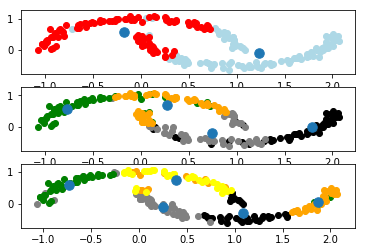

In [3]:
#Question 2.1.1
import numpy as np
#2 means clusters
_2means = KMeans(n_clusters=2,init = 'random',random_state=0).fit(noisy_moons[0])
# divide label into 2 groups

X_2,Y_2 = (noisy_moons[0],_2means.labels_) # data points
order_ind = np.argsort(Y_2) # order labels, 100 each class

X_2p1 = X_2[order_ind[0:100]]   # class 1
X_2p2 = X_2[order_ind[101:200]] # class 2
X_2center,Y_2center = np.hsplit(_2means.cluster_centers_,2)

print(X_2center)
# 4means clusters
_4means = KMeans(n_clusters=4,init = 'random',random_state=0).fit(noisy_moons[0])
X_4,Y_4 = (noisy_moons[0],_4means.labels_) # data points
order_ind = np.argsort(Y_4) # order labels, 50 each class

X_4p1 = X_4[order_ind[0:50]]   # class 1
X_4p2 = X_4[order_ind[51:100]] # class 2
X_4p3 = X_4[order_ind[101:150]] # class 3
X_4p4 = X_4[order_ind[151:200]] # class 4
X_4center,Y_4center = np.hsplit(_4means.cluster_centers_,2)

# 5 means clusters
_5means = KMeans(n_clusters=5,init = 'random',random_state=0).fit(noisy_moons[0])
X_5,Y_5 = (noisy_moons[0],_5means.labels_) # data points
order_ind = np.argsort(Y_5) # order labels, 50 each class

X_5p1 = X_5[order_ind[0:40]]   # class 1
X_5p2 = X_5[order_ind[41:80]] # class 2
X_5p3 = X_5[order_ind[81:120]] # class 3
X_5p4 = X_5[order_ind[121:160]] # class 4
X_5p5 = X_5[order_ind[161:200]] # class 5
X_5center,Y_5center = np.hsplit(_5means.cluster_centers_,2)




# Plot data
plt.figure()

plt.subplot(3,1,1)
plt.scatter(X_2p1[:,0], X_2p1[:,1],color = 'lightblue')
plt.scatter(X_2p2[:,0], X_2p2[:,1],color = 'red')
plt.scatter(X_2center,Y_2center,s = 90)

#cluster center

plt.subplot(3,1,2)
plt.scatter(X_4p1[:,0], X_4p1[:,1],color = 'black')
plt.scatter(X_4p2[:,0], X_4p2[:,1],color = 'grey')
plt.scatter(X_4p3[:,0], X_4p3[:,1],color = 'green')
plt.scatter(X_4p4[:,0], X_4p4[:,1],color = 'orange')
plt.scatter(X_4center,Y_4center,s = 90)


plt.subplot(3,1,3)
plt.scatter(X_5p1[:,0], X_5p1[:,1],color = 'black')
plt.scatter(X_5p2[:,0], X_5p2[:,1],color = 'grey')
plt.scatter(X_5p3[:,0], X_5p3[:,1],color = 'green')
plt.scatter(X_5p4[:,0], X_5p4[:,1],color = 'orange')
plt.scatter(X_5p5[:,0], X_5p5[:,1],color = 'yellow')
plt.scatter(X_5center,Y_5center,s = 90)

plt.show()

**Answer as text here**

### Question 2.2.  GMM as density estimator (6 pts)

1. Now use a Gaussian mixture model (GMM) for clustering the same two moon data. Try two clusters and plot your results. GMMs also provides you probabilities (of a sample belonging to a cluster). Print those of a few samples.
2. Increase the number of components of your GMM model. What do you observe? Use a metric to choose the number of components in a principled way. *Hint: check [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion) or [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion) *
3. It is maybe better to use GMM as a **generative model**! Generate 200 brand new samples from a well functioning gmm model with your choice of parameters and plot your results.


In [ ]:
#Q2.2.2

from sklearn.mixture import GaussianMixture
_4_GMM = GaussianMixture(n_components = 4)
X_4GMM,Y_4GMM = (noisy_moons[0],_4_GMM.fit(noisy_moons[0]).predict(noisy_moons[0]))

order_ind = np.argsort(Y_4GMM) # order labels, 50 each class

X_GMp1 = X_4GMM[order_ind[0:50]]   # class 1
X_GMp2 = X_4GMM[order_ind[51:100]]   # class 2
X_GMp3 = X_4GMM[order_ind[101:150]] # class 3
X_GMp4 = X_4GMM[order_ind[151:200]] # class 4


plt.figure()
plt.scatter(X_GMp1[:,0], X_GMp1[:,1],color = 'lightblue')
plt.scatter(X_GMp2[:,0], X_GMp2[:,1],color = 'red')
plt.scatter(X_GMp3[:,0], X_GMp3[:,1],color = 'green')
plt.scatter(X_GMp4[:,0], X_GMp4[:,1],color = 'grey')

plt.show()

In [ ]:
n = np.linspace(5,15,1000)
y = []

# for i in n:
#     y = y.append(GaussianMixture(n_components = i)
#                  .fit(noisy_moons[0]).bic(noisy_moons[0]))
    

**Answer as text here**

# Section 3: PCA and Simple Classification

It is time to move beyond the toy data set. The next data set is still small and clean but is more interesting!

## 3.1 _Example_. Wireless Indoor Localization

The next data set shows the recorded signal strength from 7 different base stations at a smart phone. The phone is in one of the four rooms {1, 2, 3, 4}. The goal is to classify the location of the phone to one of the four rooms.

This [dataset](http://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization) was used in the following publications:
> * Jayant G Rohra, Boominathan Perumal, Swathi Jamjala Narayanan, Priya Thakur, and Rajen B Bhatt, 'User Localization in an Indoor Environment Using Fuzzy Hybrid of Particle Swarm Optimization & Gravitational Search Algorithm with Neural Networks', in Proceedings of Sixth International Conference on Soft Computing for Problem Solving,2017, pp. 286-295.
> * Rajen Bhatt, 'Fuzzy-Rough Approaches for Pattern Classification: Hybrid measures, Mathematical analysis, Feature selection algorithms, Decision tree algorithms, Neural learning, and Applications', Amazon Books 


In [ ]:
import numpy as np

dataw = pd.read_csv('files/wifi_localization.csv', names=[f"s{i}" for i in range(1, 8)] + ['Room Number'])
dataw.head() # comment one to see the other
dataw.tail()

In [ ]:
print(dataw.size, dataw.shape)

In [ ]:
SRI = dataw.iloc[:,:7]
# a.shape
loc = dataw.iloc[:,7]-1
# loc.shape

# split into training and test sets
SRItrain, SRItest, loctrain, loctest = train_test_split(SRI, loc)
print(loctest)

### Question 3.1.  Clustering-based classification (6 pts)

1.  (2 pts) Use Kmeans clustering on training data to find the 4 cluster corresponding to the rooms. Then, test their quality using a [mutual information based score.](https://scikit-learn.org/stable/modules/clustering.html#mutual-information-based-scores) 
2.  (2 pts) Conduct a [PCA analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the data with 2, 3, 4 features: find singular values, variance ratios, and plot in 2D or 3D (for 2 or 3 features). What is the number of features that balances information and complexity? Is there redundancy in data? Discuss.
3. (1 pt) Now, repeat Kmeans clustering with the PCA-transformed data. Do you see an improvement in scores? Why or why not? Discuss, based on your knowledge of PCA and Kmeans clustering. 
4. (1 pt) What information does Kmeans ignore when used for classification? Is what we do a good classification method? What can you say about the complexity of the problem given?

In [ ]:
#Q3.1.1#
_4cluster = KMeans(n_clusters=4,init = 'random',random_state=0).fit(SRItrain,loctrain)
metrics.adjusted_mutual_info_score(loctrain, _4cluster.labels_)

In [ ]:
#Q3.1.2#
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
i = 2
for i in [2,3,4]:
    pca= PCA(n_components = i).fit(SRItrain,loctrain)
    _sigVal = pca.singular_values_
    _varRatio = pca.explained_variance_ratio_ 
    print('\nThe feature is %2s, \nsingular value array: %2s,\nexplained variance ratio is %2s.'%(i,_sigVal,_varRatio))
    if i == 2:
        x_2d = pca.fit_transform(SRItest)
        
        plt.figure(1)
        plt.clf()
        # Plot the training points
        plt.scatter(x_2d[:,0], x_2d[:,1], c = loctest)
    elif i == 3:
        fig = plt.figure(2)
        ax = Axes3D(fig)
        x_3d = pca.fit_transform(SRItest)
        ax.scatter(x_3d[:, 0], x_3d[:, 1], x_3d[:, 2], c=loctest)
    else:
        i=i+1 
plt.show()

**The bias and variance are both getting low, the system needs more feature to optimize.**

# Section 4: Support Vector Machines (SVMs)

We have covered the theory of [SVMs](https://en.wikipedia.org/wiki/Support-vector_machine) during the lectures. It is now time to see SVMs in action! It is appropriate to start with a noisy moon data set. We will use [sklearn.svm](https://scikit-learn.org/stable/modules/svm.html) library.

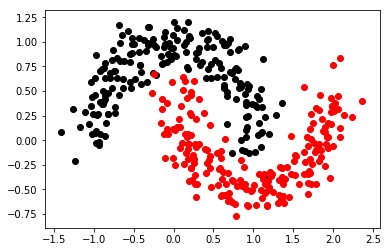

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm,cluster, datasets, mixture
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import metrics

# helper function to visualise decision boundary, uses the svm model as input
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


# Create a new moons data set
new_moons = datasets.make_moons(n_samples=400, noise=0.15)
Xm = new_moons[0] # data points
ym = new_moons[1] # 0, 1 labels of class, 200 each - giving us the ground truth

# Visualise the data set
order_ind = np.argsort(ym) # order labels, 200 each class
Xm1 = Xm[order_ind[0:200]]   # class 1 - only for visualisation
Xm2 = Xm[order_ind[201:400]] # class 2 - only for visualisation
plt.figure()
plt.scatter(Xm1[:,0], Xm1[:,1], color='black')
plt.scatter(Xm2[:,0], Xm2[:,1], color='red')
plt.show()

### Question 4.1.  Binary SVM Classifiers (6 pts)

First divide the data $(Xm,ym)$ to training and test sets using the default ratio. The range of data values is OK so you can skip data normalisation for this one.

1. Try an [SVM classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) with a linear kernel and different C parameters. Plot the test output and boundary. Discuss your observations and comment on linear separability of this data. Provide the precision, recall, and F-score metrics. *Hint: see [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics), especially [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)*
2. Next, use an [RBF kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) and repeat the first part for different C and gamma parameters. Do you observe an improvement compared to linear version (both visually and in terms of scores)? Discuss your results.
3. Perform a cross-validated grid-search over a parameter grid to find good C and gamma hyper-parameters. Plot the AUC ('mean_train_AUC') vs gamma for the best C. *Hint: check [GridSearchCV](https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py) and [scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter). Note that you should use semi-log plot!*

             precision    recall  f1-score   support

          0       0.86      0.81      0.83        52
          1       0.80      0.85      0.83        48

avg / total       0.83      0.83      0.83       100



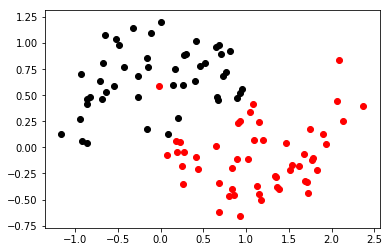

In [34]:
#4.1.1
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
Xm_train,Xm_test,ym_train,ym_test = train_test_split(Xm,ym)
svc_lin = SVC(C = 0.1,kernel = 'linear').fit(Xm_train,ym_train)
# print(svc.dual_coef_)
ym_pred = svc_lin.predict(Xm_test)

report_ = metrics.classification_report(ym_test,ym_pred)
print(report_)

order_index = np.argsort(ym_pred)
Xm1_lin = Xm_test[order_index[0:47]]  #class 1
Xm2_lin =Xm_test[order_index[48:100]] #class 2

plt.figure()
plt.scatter(Xm1_lin[:,0], Xm1_lin[:,1], color='black')
plt.scatter(Xm2_lin[:,0], Xm2_lin[:,1], color='red')
plt.show()

**As C is larger, model is more distinct on the boundary therefore the optimization model is more precise. **

             precision    recall  f1-score   support

          0       0.84      0.81      0.82        52
          1       0.80      0.83      0.82        48

avg / total       0.82      0.82      0.82       100



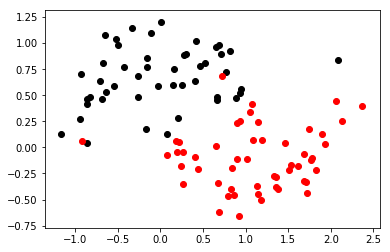

In [48]:
#4.1.2

svc_rbf = SVC(C = 100,kernel = 'rbf').fit(Xm_train,ym_train)

ym_pred = svc.predict(Xm_test)

report_ = metrics.classification_report(ym_test,ym_pred)
print(report_)

order_index = np.argsort(ym_pred)
Xm1_rbf = Xm_test[order_index[0:47]]  #class 1
Xm2_rbf =Xm_test[order_index[48:100]] #class 2

plt.figure()
plt.scatter(Xm1_rbf[:,0], Xm1_rbf[:,1], color='black')
plt.scatter(Xm2_rbf[:,0], Xm2_rbf[:,1], color='red')
plt.show()

**For the rbf, mean and variance will not change.**

In [49]:
#4.1.3
from sklearn.model_selection import GridSearchCV
GridSearchCV(scoring)

# Section 5: Logistic Regression

Logistic regression uses a linear statistical model. It measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function. It is also used for classification. Let's start with a very simple example to **visualise the logistic function**.

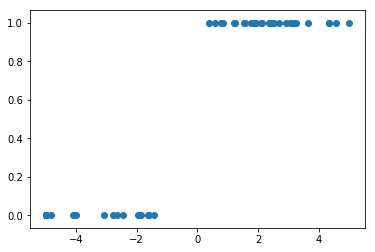

In [5]:
# Generate a toy dataset

toy_samples = 50
X_toy = np.linspace(-5, 5, toy_samples)
Xtoy_test = np.linspace(-5, 5, 200)
# gaussian noise added
X_toy = X_toy + 2*np.random.normal(size=toy_samples)
# upper, lower bound
X_toy = np.clip(X_toy,-5, 5).reshape(-1,1)
# create labels
y_toy = ((np.sign(X_toy)+1)/2.0).ravel()
# visualise
plt.figure()
plt.scatter(X_toy, y_toy)
plt.show()

### Question 5.1.  Simple Logistic Regression (LR) (2 pts)

1. (1 pt) Fit a logistic and linear regression model to the data *(X_toy, y_toy)*. Find the logistic and linear model coefficients and bias *(trained_model.coef_, trained_model.intercept_)*. Hint: check [Sklearn logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
2. (1 pts) Test your models on a simple test set {Xtoy_test} given above. Plot your results and discuss.

**Thanks**

Coefficient is [[1.52599707]], Bias is [0.40497357]


D:\Python\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


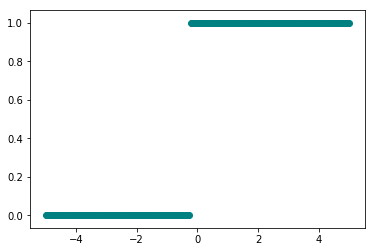

In [6]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 0.5).fit(X_toy,y_toy)
print('Coefficient is %2s, Bias is %2s'%(LR.coef_,LR.intercept_))
#transform with test data
Xtoy_test=Xtoy_test.reshape(-1,1)
ytoy_test = LR.predict(Xtoy_test)

plt.figure()
plt.scatter(Xtoy_test, ytoy_test,c='teal')
plt.show()


## 5.2 *Example*. Electrical Grid Stability with Simulated Data

This simulated [dataset](http://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+) is related to local stability of a 4-node star system (electricity producer is in the center), which implements a decentralised Smart Grid Control concept. 

>Arzamasov, Vadim, Klemens Boehm, and Patrick Jochem. ['Towards Concise Models of Grid Stability.'](https://dbis.ipd.kit.edu/download/DSGC_simulations.pdf) Communications, Control, and Computing Technologies for Smart Grids (SmartGridComm), 2018 IEEE International Conference on. IEEE, 2018 

*Note that, in many engineering applications such datasets can be generated through simulations (easy) or experimentation (harder). Different from classical ML applications, engineers often have a very good understanding of the underlying physical models, which gives a unique advantage. We will, however, keep it simple in this workshop and use the dataset as is.*

Let's load and process the dataset.

In [ ]:
griddata=pd.read_csv('files/Data_for_UCI_named.csv')
griddata.head()

In [ ]:
Xgrid = griddata.iloc[:, 0:13]
Xgrid.head()

In [ ]:
ygrid = griddata.iloc[:, 13]
# 0 if unstable and 1 if stable
ygrid = [ 0 if x=='unstable' else 1 for x in ygrid]

print("prepared data: ",Xgrid[0:5], ygrid[0:5])

### Question 5.3.  Checking Grid Stability using Logistic Regression (LR)  (6 pts)

Now, we can use the simulated dataset *(Xgrid,ygrid)* to check grid stability. We will use first logistic regression for this purpose. Unfortunately, it is not possible to directly visualise this dataset, so we have to use performance metrics.

1. (1 pt) Preprocess and normalise *Xgrid* using a [*sklearn.preprocessing*](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). You can use, for example, *StandardScaler* or *MinMaxScaler*.
2. (2 pts) Train a logistic regression model that classifies the grid as stable or not, based on input *Xgrid*. Don't forget to divide *Xgrid* into training and test sets. Quantify the performance of LR using standard metrics such as accuracy, precision, recall, and f1 score on the test set. Plot the [ROC curve](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). How do these change w.r.t. [parameter C](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)? Discuss your observations.
3. (2 pts) What are the coefficients of the LR that you trained? What do they tell you about the impact of independent input variables on the dependent output variable *ygrid*? Discuss. *Hint: you can use [regressors package](https://regressors.readthedocs.io/en/latest/index.html) stats function to calculate p-values. See, e.g. [this](http://www.r-tutor.com/elementary-statistics/logistic-regression/significance-test-logistic-regression) or [this](http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients) for info.* 
4. (1 pts) Use a nonlinear SVM, e.g. with rbf kernel, to solve the problem. Quantify the performance of SVM classifier and compare with LR one. Discuss your findings.

**Answer as text here**

In [ ]:
#Q5.3.1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xgrid)
Xnorm = scaler.transform(Xgrid)
print('Mean : %2s, \nX_norm:\n %2s'%(scaler.mean_,Xnorm))


In [ ]:
#Q5.3.2&5.3.3
from sklearn.model_selection import train_test_split
from sklearn.svm import l1_min_c

Xgrid_train, Xgrid_test, ygrid_train, ygrid_test = train_test_split(Xnorm, ygrid)
cval = l1_min_c(Xgrid_train,ygrid_train,loss = 'log')
print('C_value is %2s.'%(cval))


LR_5 = LogisticRegression(C=cval,penalty='l1').fit(Xgrid_train,ygrid_train)
ygrid_pred = LR_5.predict(Xgrid_test)
F,T,thre = metrics.roc_curve(ygrid_test,ygrid_pred,pos_label =1)
print('\n%2s\n%2s\n%2s'%(F,T,thre))
print(F>=thre,T>=thre)
print('\nClass: %2s\nCoefficient: %2s\nIntercept: %2s'%(LR_5.classes_,LR_5.coef_ ,LR_5.intercept_ )) 


**They are independent random variables**

## 6 (_Optional_ Bonus, 10 pts) Communications Detective 

Your job as a detective is to distinguish malicious people's communications from background civilian communication traffic. As a 21st century detective, you have access to a cognitive radio network and you have ML knowledge!

The [dataset](files/svm_bonus_data.csv) is collected from a simulation where there are multiple malicious people and civilians communicating in a region with multiple passive cognitive radio nodes.
Data about each transmission source is collected from the listener nearest to it. The objective is to classify if a transmission source is an rogue agent or a civilian based on the data.

<img align="left" src="img/detective.png" width="200" hspace="20"/>      <img align="center" src="img/omnet.png" width="400" hspace="20"/>

The data file contains data from 2 classes:
 * civilians - 129 instances (labeled as +1)
 * rogue agents - 129 instances (labeled as -1)

**Features/attributes** are **not** normalised.
1. label 2. carrier_frequency 2. bandwidth 3. bitrate 4. session duration 5. message_length 6. inter-arrival time (iat)

For full bonus points:
1. Normalise and investigate the data, try e.g. PCA.
2. Try multiple classifiers, e.g. SVM and logistic regression, find their hyper-parameters.
3. Do cross validation, give performance results using metrics, compare/contrast methods.
4. Discuss your findings based on your theoretical/practical knowledge.

In [ ]:
commdata=pd.read_csv('files/svm_bonus_data.csv')
commdata.head()

# <font color='red'> Workshop Report Submission Instructions </font>

_You should ideally complete the workshop tasks and answer the questions within the respective session!_ The submission deadline is usually Friday, the week after. Submission deadlines will be announced on LMS.

It is **mandatory to follow all of the submissions guidelines** given below. _Don't forget the Report submission information on top of this notebook!_

1. The completed Jupyter notebook and its Pdf version (you can simply print-preview and then print as pdf from within your browser) should be uploaded to the right place in LMS by the announced deadline. _It is your responsibility to follow the announcements!_ **Late submissions will be penalised (up to 100% of the total mark depending on delay amount)!**
2. Filename should be “ELEN90061 Workshop **W: StudentID1-StudentID2** of session **Day-Time**", where **W** refers to the workshop number, **StudentID1-StudentID2** are your student numbers, **Day-Time** is your session day and time, e.g. *Tue-14*.
3. Answers to questions, simulation results and diagrams should be included in the Jupyter notebook as text, code, plots. *If you don't know latex, you can write formulas/text to a paper by hand, scan it and then include as image within Markdown cells.*
4. One report submission per group. 

### Additional guidelines for your programs:

* Write modular code using functions. 
* Properly indent your code. But Python forces you do that anyway ;)
* Heavily comment the code to describe your implementation and to show your understanding. No comments, no credit!
* Make the code your own! It is encouraged to find and get inspired by online examples but you should exactly understand, modify as needed, and explain your code via comments. There will be no credit for blind copy/paste even if it somehow works (and it is easier to detect it than you might think)!